# Analise de dados - Study Case Petlove

## Importando os dados e fazendo configurações nos dados

In [2]:
#Import das bibliotecas necessarias

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#lista da definicao das colunas do arquivo

explain = {
    "id" : "Identificação do cliente",
    "created_at" : "Data de criação da assinatura",
    "updated_at" : "Data da última modificação da assinatura",
    "deleted_at" : "Data de cancelamento da assinatura",
    "name_hash" : "Nome do usuário (criptografado)",
    "email_hash" : "Email (criptografado)",
    "address_hash" : "Endereço (criptografado)",
    "birth_date" : "Data de aniversário do cliente",
    "status" : "Status da assinatura",
    "version" : "Versão da assinatura",
    "city" : "Cidade do cliente",
    "state" : "Estado do cliente",
    "neighborhood" : "Bairro do cliente",
    "last_date_purchase" : "Data do último pedido que ocorreu pela assinatura",
    "average_ticket" : "Média de gasto por pedido",
    "items_quantity" : "Média de itens na assinatura",
    "all_revenue" : "Total de receita realizado pelo cliente",
    "all_orders" : "Total de pedidos realizado pelo cliente",
    "recency" : "Tempo desde a última compra do cliente",
    "marketing_source" : "Canal de marketing que converteu a assinatura"    
}

In [4]:
#Realizando a importacao dos dados
df = pd.read_csv('data-test-analytics.csv')

In [5]:
#observando a estrutura dos dados
df.head(2)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search


In [6]:
#alterando as colunas de criação da assinatura e dele
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['deleted_at'] = pd.to_datetime(df['deleted_at'])
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'])

In [7]:
#Mostra numero de colunas e linhas

df.shape

(10000, 20)

In [8]:
#Mostra os nomes das colunas 

df.columns.values

array(['id', 'created_at', 'updated_at', 'deleted_at', 'name_hash',
       'email_hash', 'address_hash', 'birth_date', 'status', 'version',
       'city', 'state', 'neighborhood', 'last_date_purchase',
       'average_ticket', 'items_quantity', 'all_revenue', 'all_orders',
       'recency', 'marketing_source'], dtype=object)

In [9]:
#Chegando por dados nulos

df.isna().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

## Analisando informações gerais

In [10]:
#algumas estatisticas dos dados
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


In [11]:
#numero de assinaturas canceladas
df['status'].value_counts()

active      8524
paused       971
canceled     505
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

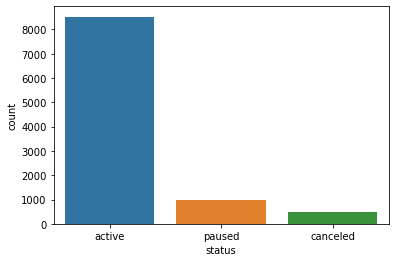

In [12]:
#visualizando a contagem dos assinantes, não assinantes e assinaturas pausadas
sns.countplot(x=df['status'])

In [13]:
#qual a porcentagem dos status dos clientes?
num_assinantes = df[df.status == 'active'].shape[0]
num_pausados = df[df.status == 'paused'].shape[0]
num_churn = df[df.status == 'canceled'].shape[0]

print('{:10.2f}% de clientes que manteram sua assinatura'.format(num_assinantes / (num_churn + num_assinantes + num_pausados) * 100))

print('{:10.2f}% de clientes que pausaram sua assinatura'.format(num_pausados / (num_churn + num_assinantes + num_pausados) * 100))

print('{:10.2f}% de clientes cancelaram sua assinatura'.format(num_churn / (num_churn + num_assinantes + num_pausados) * 100))

print('Dados até a data de {}'.format(df['created_at'].max().year))

     85.24% de clientes que manteram sua assinatura
      9.71% de clientes que pausaram sua assinatura
      5.05% de clientes cancelaram sua assinatura
Dados até a data de 2021


As colunas que entregam informações de data encontram-se no formato String. Assim para podermos trabalhar com o tipo data, geramos um novo data frame para nossa análise. 

## Comparação entre os 3 status

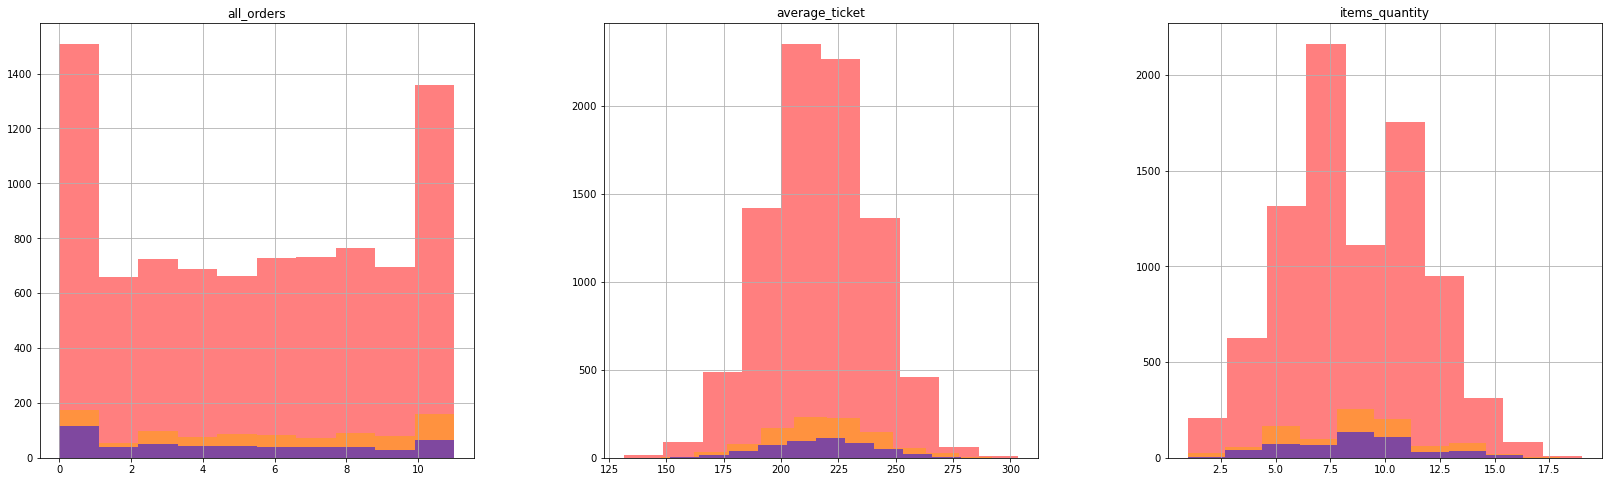

<Figure size 2016x576 with 0 Axes>

In [14]:
#distribuição dos contas canceladas em total de pedidos, média de gasto por pedido, quantidade de itens pedidos

categorias_numericas = ['all_orders', 'average_ticket','items_quantity']

fig, ax = plt.subplots(1, 3, figsize = (28,8))
plt.figure(figsize=(28,8))
df[df.status == 'active'][categorias_numericas].hist(bins = 10, color ='red',  alpha =0.5, ax=ax)
df[df.status == 'paused'][categorias_numericas].hist(bins = 10,  color = 'orange',  alpha =0.5, ax=ax)
df[df.status == 'canceled'][categorias_numericas].hist(bins = 10, color = 'blue', alpha =0.5, ax=ax)
plt.show()

In [15]:
df[df.status == 'active'][categorias_numericas].mean()

all_orders          5.444510
average_ticket    216.732335
items_quantity      8.477710
dtype: float64

In [16]:
df[df.status == 'paused'][categorias_numericas].mean()

all_orders          5.450051
average_ticket    218.037307
items_quantity      8.616890
dtype: float64

In [17]:
df[df.status == 'canceled'][categorias_numericas].mean()

all_orders          4.857426
average_ticket    217.438501
items_quantity      8.647525
dtype: float64

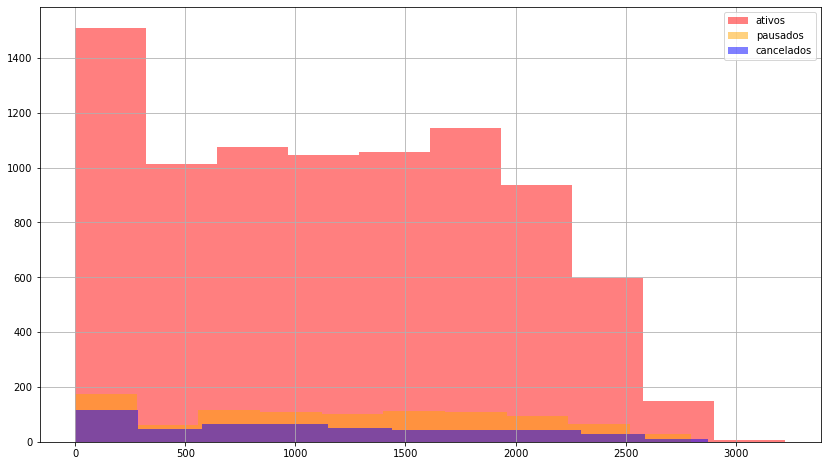

In [18]:
#distribuicao da receita gerada dos três status

plt.figure(figsize=(14,8))
df[df.status == 'active']['all_revenue'].hist(bins = 10, color ='red',  alpha =0.5, label = 'ativos')
df[df.status == 'paused']['all_revenue'].hist(bins = 10,  color = 'orange',  alpha =0.5, label = 'pausados')
df[df.status == 'canceled']['all_revenue'].hist(bins = 10, color = 'blue', alpha =0.5,label = 'cancelados')
plt.legend()
plt.show()

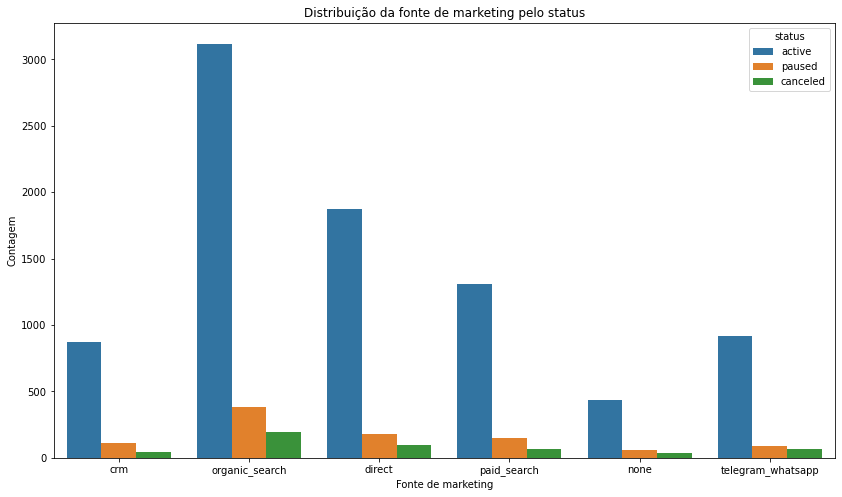

In [19]:
#distribuição dos status da assinatura pela fonte de marketing
plt.figure(figsize=(14,8))
sns.countplot( x = 'marketing_source', hue = 'status' , data = df)
plt.title('Distribuição da fonte de marketing pelo status')
plt.xlabel('Fonte de marketing')
plt.ylabel('Contagem')
plt.show()

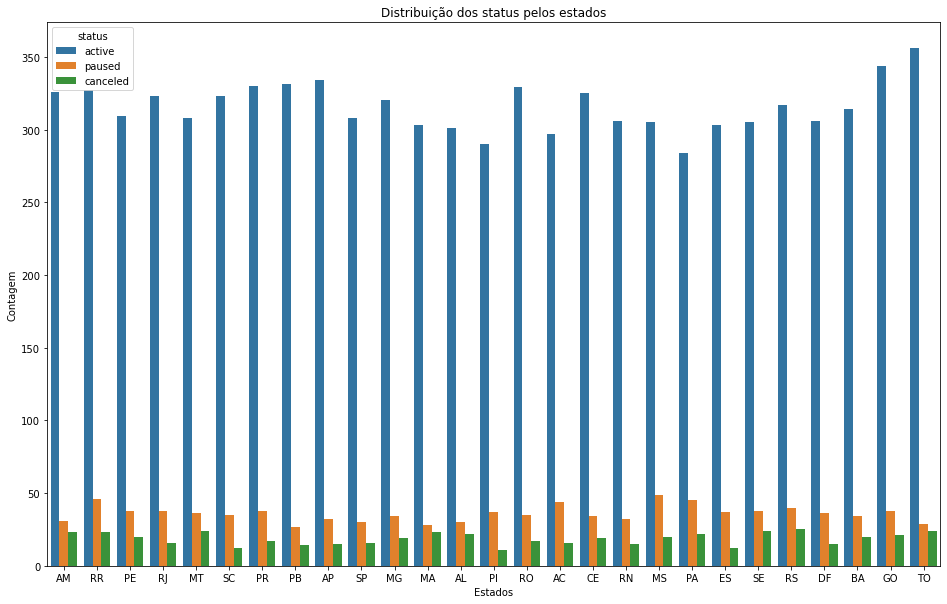

In [20]:
#distribuição dos status pelos estados
plt.figure(figsize=(16,10))
sns.countplot( x = 'state', hue = 'status' , data = df)
plt.title('Distribuição dos status pelos estados')
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.show()

In [21]:
df['version'].value_counts() #dados muito dispersos

4.26.7     24
3.25.9     22
4.27.7     22
4.23.8     20
3.28.7     20
           ..
2.48.12     1
6.22.12     1
4.46.7      1
6.9.6       1
5.51.6      1
Name: version, Length: 2905, dtype: int64

## Estudo do perfil dos clientes com status cancelados(Churn)

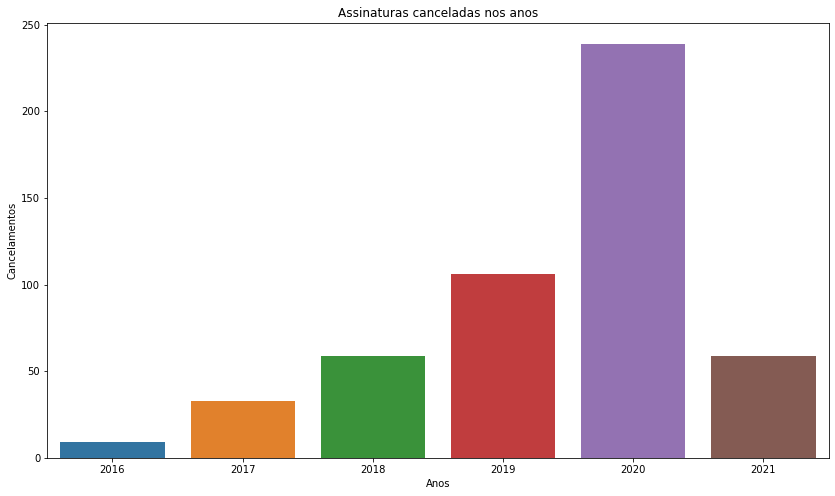

In [22]:
# distribuição dos cancelamentos de assinatura pelos anos
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"')['deleted_at']).year)
plt.title('Assinaturas canceladas nos anos')
plt.xlabel('Anos')
plt.ylabel('Cancelamentos')
plt.show() 

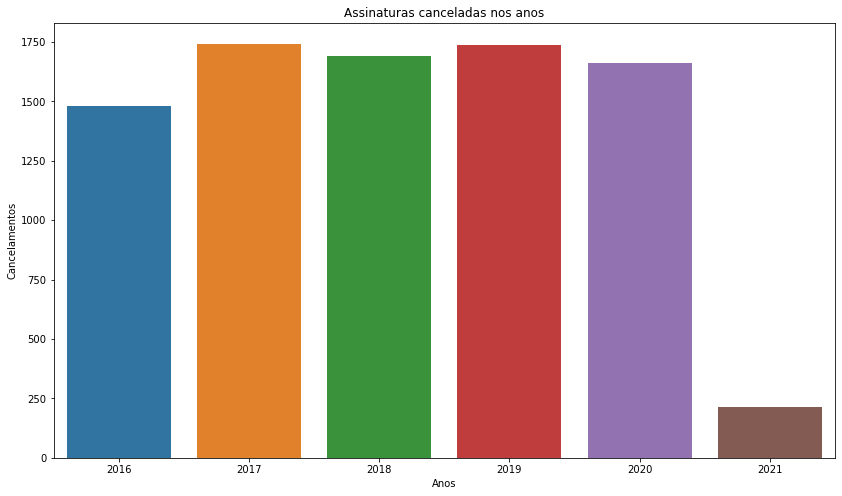

In [31]:
# distribuição dos cancelamentos de assinatura pelos anos
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "active"')['created_at']).year)
plt.title('Assinaturas canceladas nos anos')
plt.xlabel('Anos')
plt.ylabel('Cancelamentos')
plt.show() 

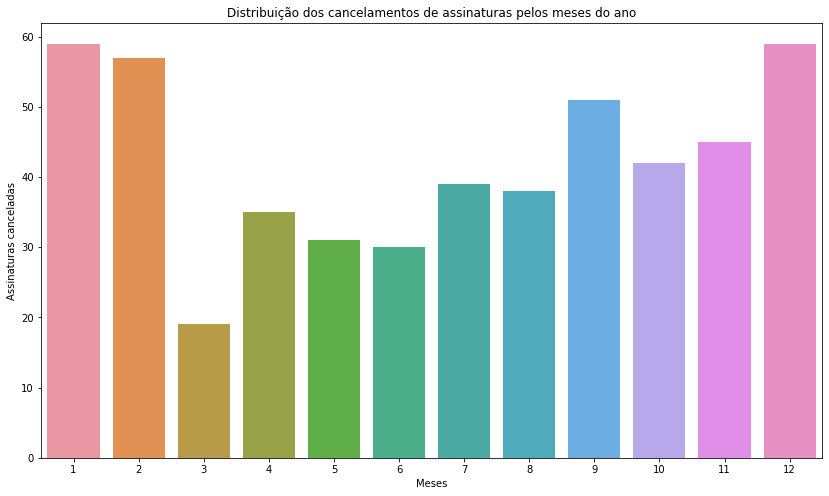

In [23]:
#distribuição do cancelamento de assinaturas pelos meses
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"')['deleted_at']).month)
plt.title('Distribuição dos cancelamentos de assinaturas pelos meses do ano')
plt.xlabel('Meses')
plt.ylabel('Assinaturas canceladas')
plt.show()

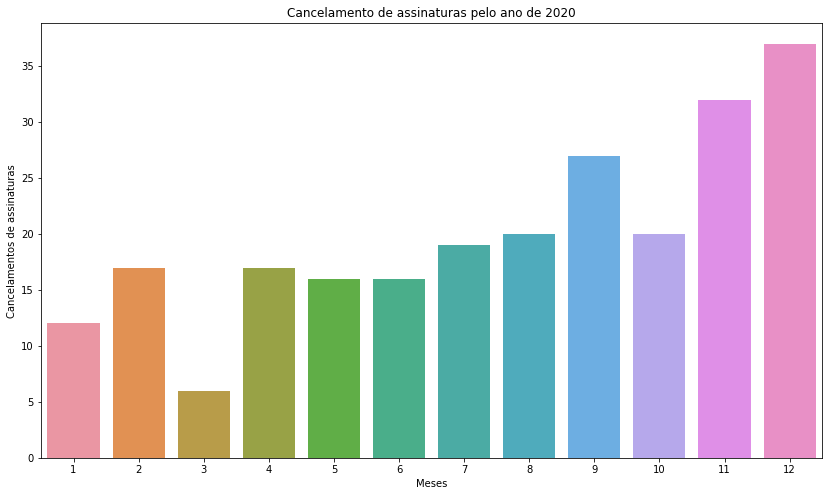

In [24]:
#cancelamento de assinaturas em 2020
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"').loc[(df['deleted_at'] >= '2020') & (df['deleted_at'] < '2021')]['deleted_at']).month)
plt.title('Cancelamento de assinaturas pelo ano de 2020')
plt.xlabel('Meses')
plt.ylabel('Cancelamentos de assinaturas')
plt.show()

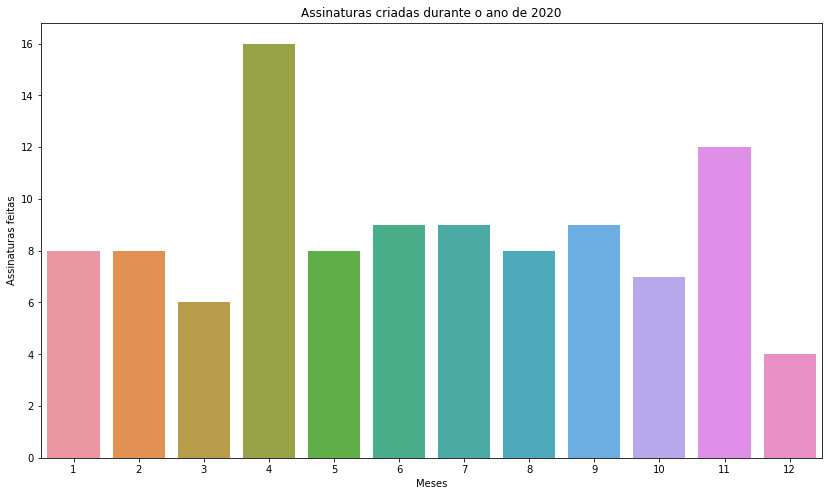

In [25]:
#criação de assinaturas em 2020
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"').loc[(df['created_at'] >= '2020') & (df['created_at'] <'2021')]['created_at']).month)
plt.title('Assinaturas criadas durante o ano de 2020')
plt.xlabel('Meses')
plt.ylabel('Assinaturas feitas')
plt.show()

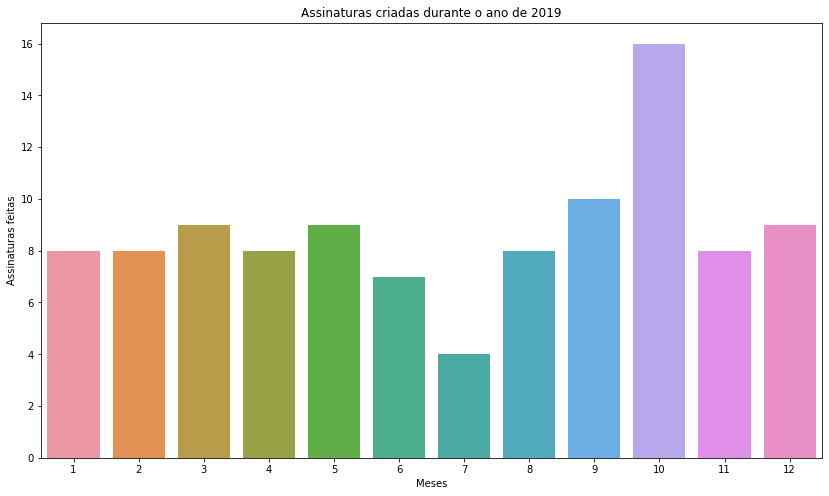

In [27]:
#criação de assinaturas em 2020
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"').loc[(df['created_at'] >= '2019') & (df['created_at'] <'2020')]['created_at']).month)
plt.title('Assinaturas criadas durante o ano de 2019')
plt.xlabel('Meses')
plt.ylabel('Assinaturas feitas')
plt.show()

Podemos observar que o período de maior evasão do ano de 2020 foi em Dezembro, aliado ao menor período de aberturas de assinaturas.

In [88]:
explain['average_ticket']

'Média de gasto por pedido'

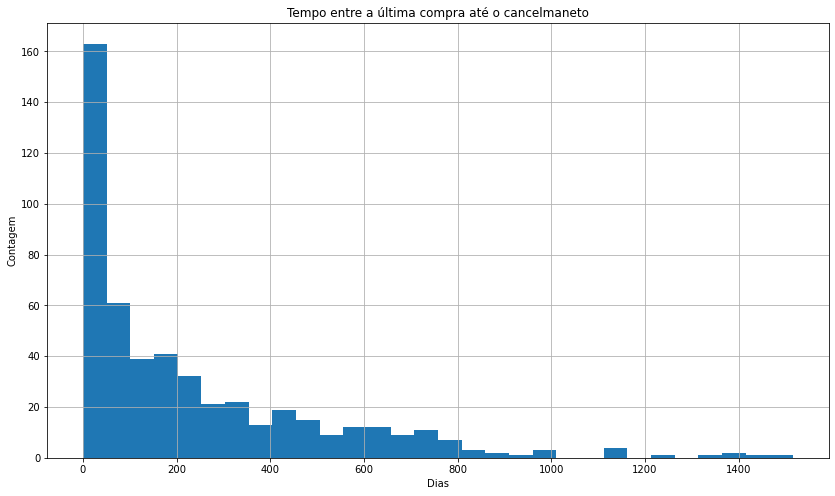

In [37]:
#tempo do inicio da assinatura até o cancelamento
plt.figure(figsize=(14,8))
(df.query('status == "canceled"')['deleted_at'] - df.query('status == "canceled"')['last_date_purchase']).dt.days.hist(bins=30)
plt.title('Tempo entre a última compra até o cancelmaneto')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

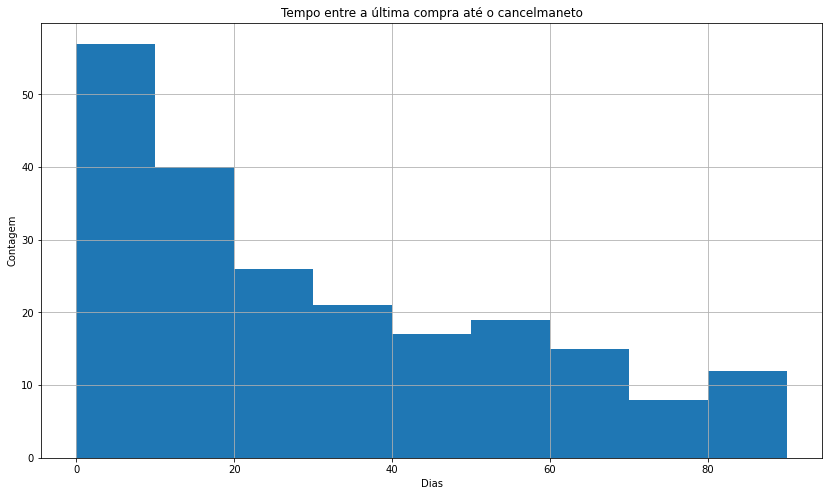

In [38]:
plt.figure(figsize=(14,8))
(df.query('status == "canceled"')['deleted_at'] - df.query('status == "canceled"')['last_date_purchase']).dt.days.hist(bins=range(0,100,10))
plt.title('Tempo entre a última compra até o cancelmaneto')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

Observa-se que a maior chance da pessoa cancelar sua assinatura quando não compra pro 1 mês.

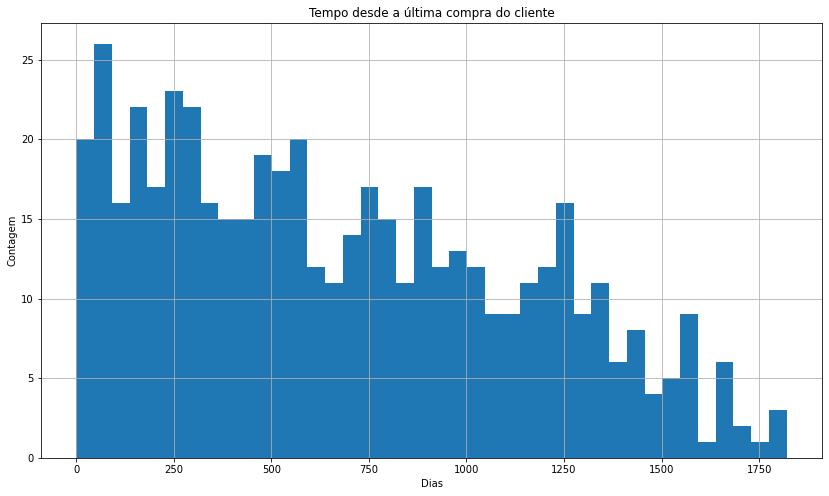

In [41]:
plt.figure(figsize=(14,8))
df.query('status == "canceled"')['recency'].hist(bins=40)
plt.title('Tempo desde a última compra do cliente')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

## Estudo do perfil dos clientes do ano de 2020

In [110]:
explain

{'id': 'Identificação do cliente',
 'created_at': 'Data de criação da assinatura',
 'updated_at': 'Data da última modificação da assinatura',
 'deleted_at': 'Data de cancelamento da assinatura',
 'name_hash': 'Nome do usuário (criptografado)',
 'email_hash': 'Email (criptografado)',
 'address_hash': 'Endereço (criptografado)',
 'birth_date': 'Data de aniversário do cliente',
 'status': 'Status da assinatura',
 'version': 'Versão da assinatura',
 'city': 'Cidade do cliente',
 'state': 'Estado do cliente',
 'neighborhood': 'Bairro do cliente',
 'last_date_purchase': 'Data do último pedido que ocorreu pela assinatura',
 'average_ticket': 'Média de gasto por pedido',
 'items_quantity': 'Média de itens na assinatura',
 'all_revenue': 'Total de receita realizado pelo cliente',
 'all_orders': 'Total de pedidos realizado pelo cliente',
 'recency': 'Tempo desde a última compra do cliente',
 'marketing_source': 'Canal de marketing que converteu a assinatura'}

<AxesSubplot:>

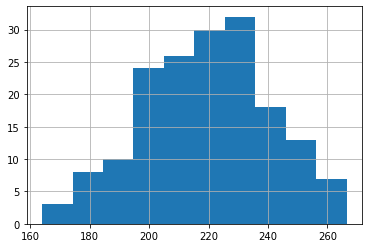

In [111]:
plt.figure()
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['average_ticket'].hist()

<AxesSubplot:xlabel='marketing_source', ylabel='count'>

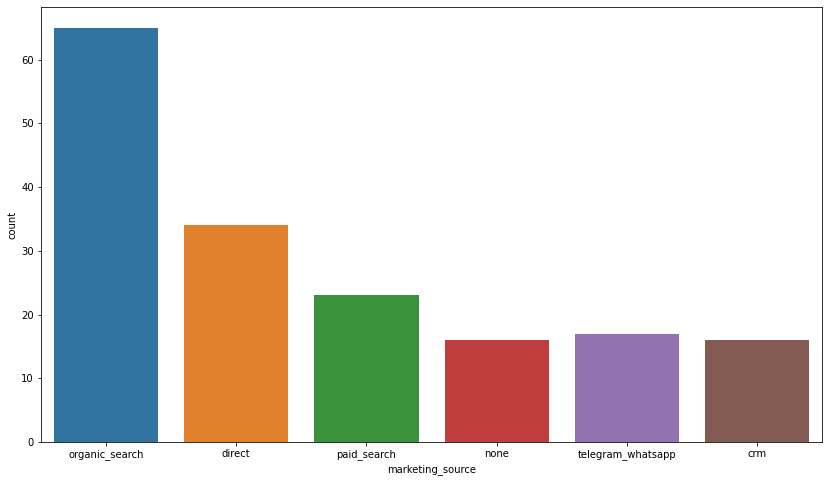

In [115]:
plt.figure(figsize = (14,8))
sns.countplot(x = df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['marketing_source'])

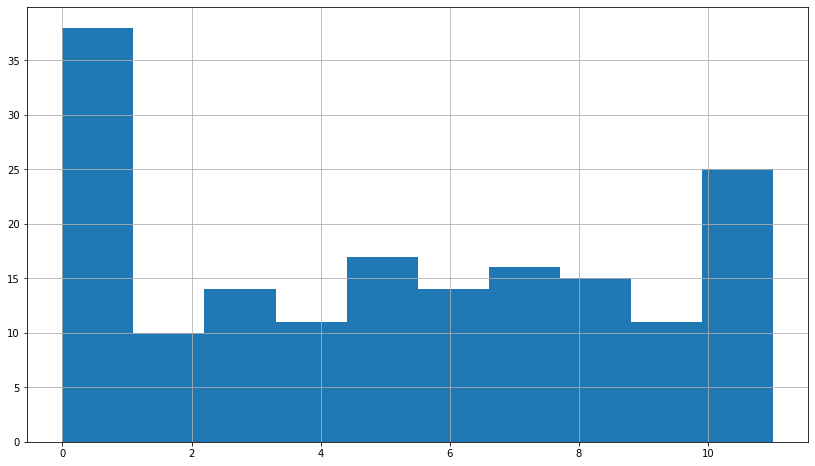

In [132]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['all_orders'].hist(bins=10)
plt.show()

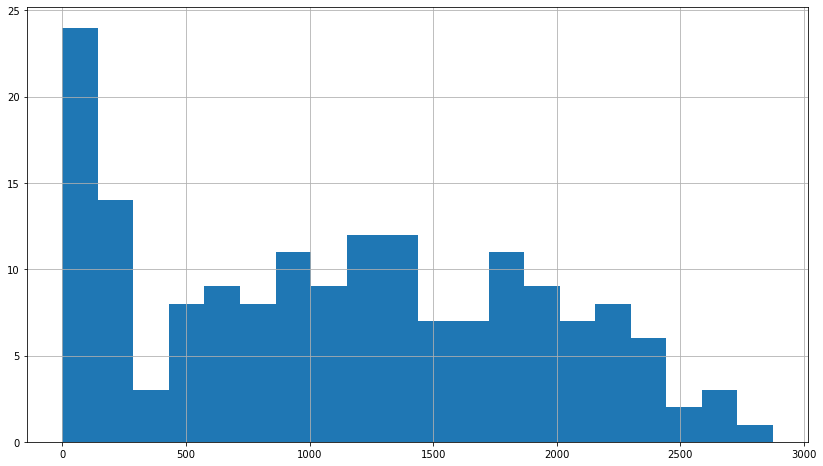

In [138]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['all_revenue'].hist(bins=20)
plt.show()

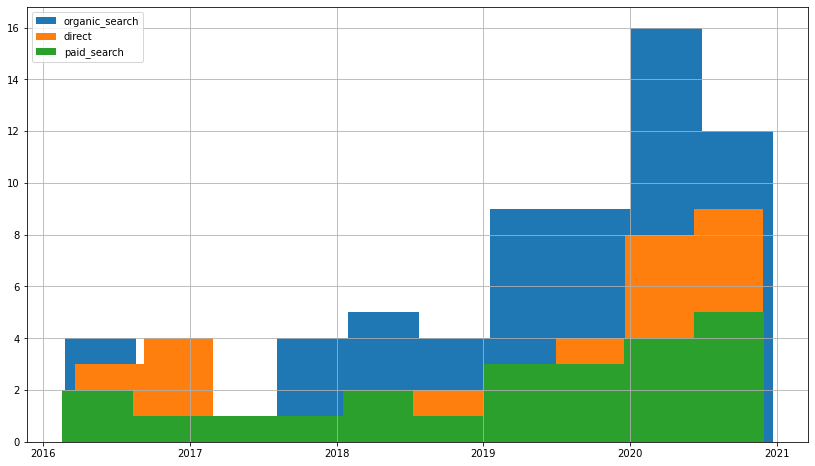

In [163]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'organic_search')]['created_at'].hist(bins=10, label = 'organic_search')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'direct')]['created_at'].hist(bins=10, label = 'direct')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'paid_search')]['created_at'].hist(bins=10, label = 'paid_search')
plt.legend()
plt.show()

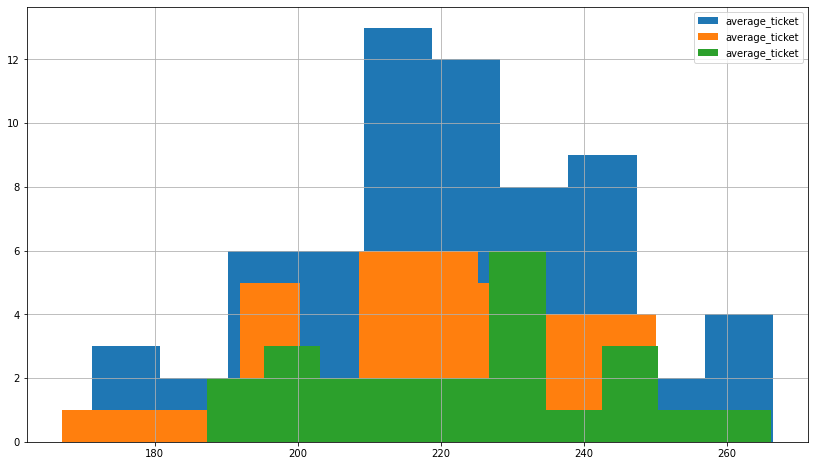

In [162]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'organic_search')]['average_ticket'].hist(bins=10, legend = 'organic_search')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'direct')]['average_ticket'].hist(bins=10, legend = 'direct')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'paid_search')]['average_ticket'].hist(bins=10, legend = 'paid_search')
plt.show()

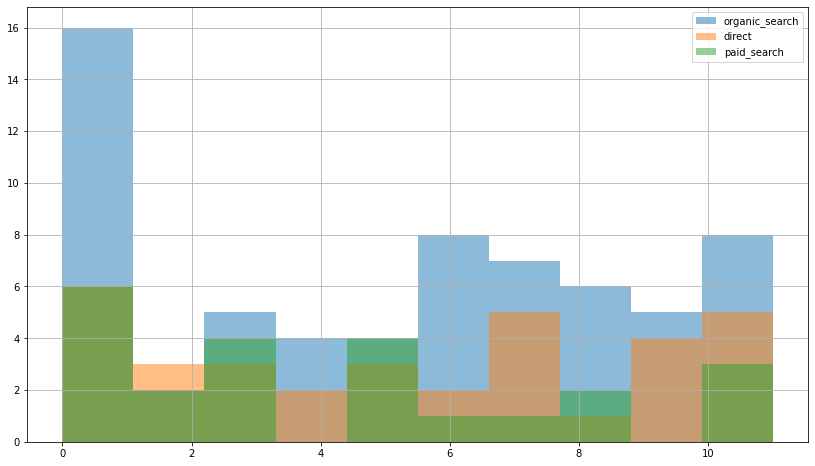

In [241]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'organic_search')]['all_orders'].hist(bins=10,alpha = 0.5, label = 'organic_search')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'direct')]['all_orders'].hist(bins=10, alpha = 0.5,label = 'direct')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'paid_search')]['all_orders'].hist(bins=10, alpha = 0.5,label = 'paid_search')
plt.legend()
plt.show()

In [174]:
#tempo de permanência dessas pessoas na assinatura

df2 = df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)].copy()

tempo_de_permanencia = df2['deleted_at'] - df2['created_at']

In [176]:
df2['tempo_permanencia'] = tempo_de_permanencia

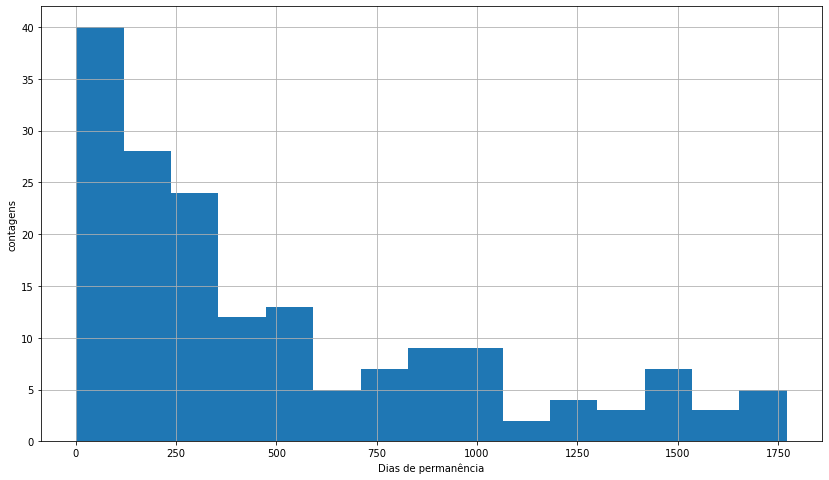

In [194]:
plt.figure(figsize = (14,8))
df2['tempo_permanencia'].dt.days.hist(bins=15)
plt.xlabel('Dias de permanência')
plt.ylabel('contagens')
plt.show()

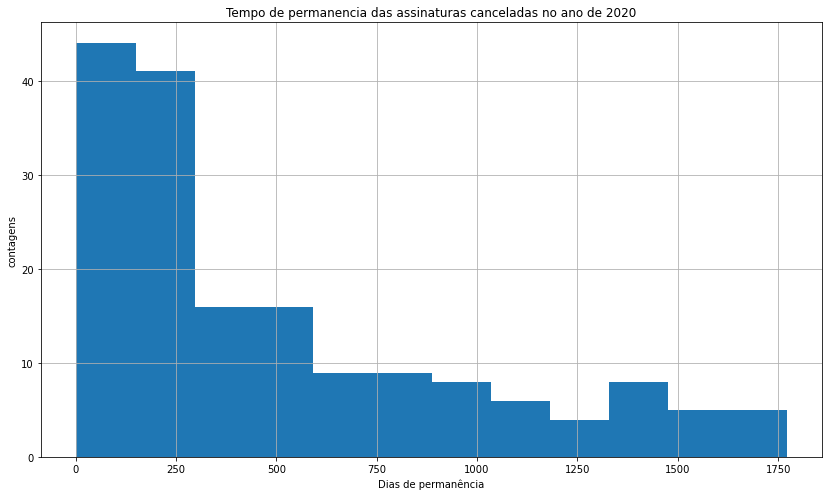

In [263]:
#tempo de permanencia das pessoas que cancelaram suas assinaturas em 2020
plt.figure(figsize = (14,8))
df2['tempo_permanencia'].dt.days.hist(bins=12)
plt.title('Tempo de permanencia das assinaturas canceladas no ano de 2020')
plt.xlabel('Dias de permanência')
plt.ylabel('contagens')
plt.show()

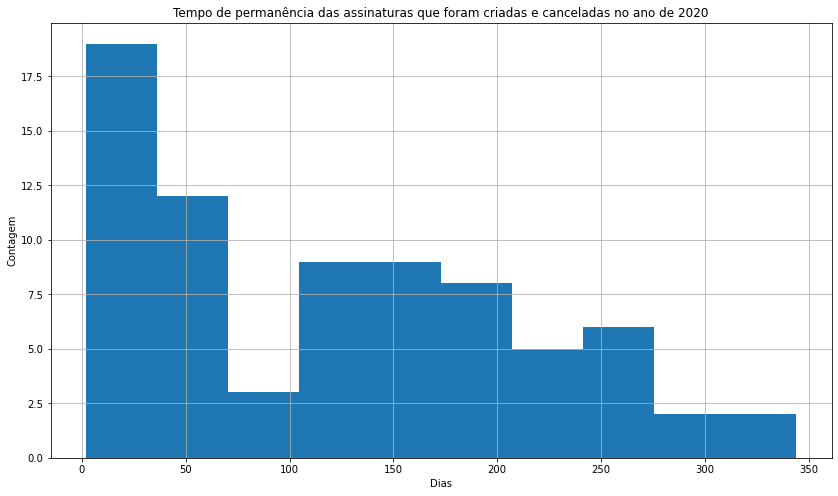

In [262]:
plt.figure(figsize = (14,8))
df2.loc[pd.DatetimeIndex(df2['created_at']).year == 2020]['tempo_permanencia'].dt.days.hist(bins=10)
plt.title('Tempo de permanência das assinaturas que foram criadas e canceladas no ano de 2020')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

## Estudo do perfil dos clientes que cancelaram sua assinatura em 2019

In [265]:
df.head(1)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm


In [271]:
#Removendo colunas desnecessarias para a analise
limpo_df = df.drop(['id','name_hash','email_hash','address_hash','version','city','state','neighborhood'],axis = 1)

In [272]:
limpo_df.head(1)

,created_at,updated_at,deleted_at,birth_date,status,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,07/10/74 12:00 AM,active,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm


In [273]:
limpo_df.shape

(10000, 12)

In [277]:
limpo_df

,created_at,updated_at,deleted_at,birth_date,status,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,2982,478,1482,4098,0,510,151.142942,9,906.857651,6,29,0
1,7778,467,6742,4006,2,502,236.991790,3,236.991790,1,35,3
2,6127,466,6743,1664,0,501,211.955597,12,2331.511572,11,36,3
3,4879,472,6744,6983,0,504,204.113227,7,1224.679359,6,33,3
4,4631,484,6745,4036,0,515,252.940997,8,2023.527980,8,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3141,517,3502,5446,0,533,215.079785,4,1075.398927,5,12,4
9996,4354,484,3503,5511,0,515,254.525826,9,2290.732434,9,25,3
9997,2973,457,3504,309,0,496,208.741902,7,1252.451411,6,40,4
9998,1880,468,8435,4674,0,503,211.174796,8,0.000000,0,34,1


In [276]:
#convertendo colunas não numericas em numericas
for coluna in limpo_df.columns:
    if limpo_df[coluna].dtype == np.number:
        continue
    limpo_df[coluna] = LabelEncoder().fit_transform(limpo_df[coluna])

C:\Users\bateq\AppData\Local\Temp/ipykernel_15744/264815922.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if limpo_df[coluna].dtype == np.number:


In [278]:
#scaled the data
X = limpo_df.drop('status',axis=1)
y = limpo_df['status']

X = StandardScaler().fit_transform(X)

In [279]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [281]:
model = LogisticRegression()

model.fit(X_train, y_train)


C:\Users\bateq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [284]:
predictions = model.predict(x_test)

print(predictions)

[0 0 0 ... 0 0 0]


In [286]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1715
           1       1.00      0.98      0.99        97
           2       0.00      0.00      0.00       188

    accuracy                           0.91      2000
   macro avg       0.63      0.66      0.65      2000
weighted avg       0.82      0.91      0.86      2000



C:\Users\bateq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bateq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bateq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'